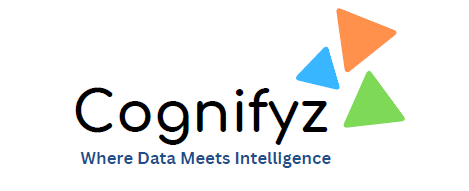

##### NAME - ASHWIN SURESH
##### DOMAIN - MACHINE LEARNING
##### Ref. : CTI/A1/C127540


---
---

# Task 3: Cuisine Classification


This notebook builds a classification pipeline to predict a restaurant’s primary cuisine, following these steps:

1. Data Load & Quality Checks
2. Exploratory Data Analysis
3. Target Preparation & Class Balancing
4. Preprocessing & Feature Engineering
5. Train–Test Split
6. Model Training & Comparison
7. Hyperparameter Tuning
8. Final Evaluation & Visualization
9. Interpretation & Business Insights
10. ROC Curves

---
---

## 1. Data Load & Quality Checks

---

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
rest_data = pd.read_csv('/content/drive/MyDrive/Dataset.csv')

Mounted at /content/drive


---

In [ ]:
print("\nFirst 5 rows of the dataset:")
rest_data.head()


First 5 rows of the dataset:


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


---

In [ ]:
print("Dataset shape:", rest_data.shape)
rest_data.info()

Dataset shape: (9551, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9551 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 


---

In [ ]:
# Check for missing values
print("Missing values in each column:")
missing_values = rest_data.isnull().sum()
print(missing_values[missing_values > 0])

Missing values in each column:
Cuisines    9
dtype: int64


---

In [ ]:
# Replace missing cuisines with 'Unknown'
rest_data['Cuisines'] = rest_data['Cuisines'].fillna('Unknown')

---

In [ ]:
# Basic statistics
print("\nBasic statistics of numerical columns:")
rest_data.describe()


Basic statistics of numerical columns:


,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


---

In [ ]:
# Explore unique values in the Cuisines column (our target)
print("\nNumber of unique cuisines:", rest_data['Cuisines'].nunique())


Number of unique cuisines: 1825


---

In [ ]:
# Rating sanity check
print("\nRating range:", rest_data['Aggregate rating'].min(), "to", rest_data['Aggregate rating'].max())
print("Counts of negative or zero ratings:", (rest_data['Aggregate rating'] <= 0).sum())


Rating range: 0.0 to 4.9
Counts of negative or zero ratings: 2148


---

In [ ]:
# Duplicates
dup_count = rest_data['Restaurant ID'].duplicated().sum()
print(f"Duplicate Restaurant IDs: {dup_count}")

Duplicate Restaurant IDs: 0


---
---

## 2.Exploratory Data Analysis

---

<ipython-input-15-6362fbd5fb30>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Primary Cuisine', data=rest_data,


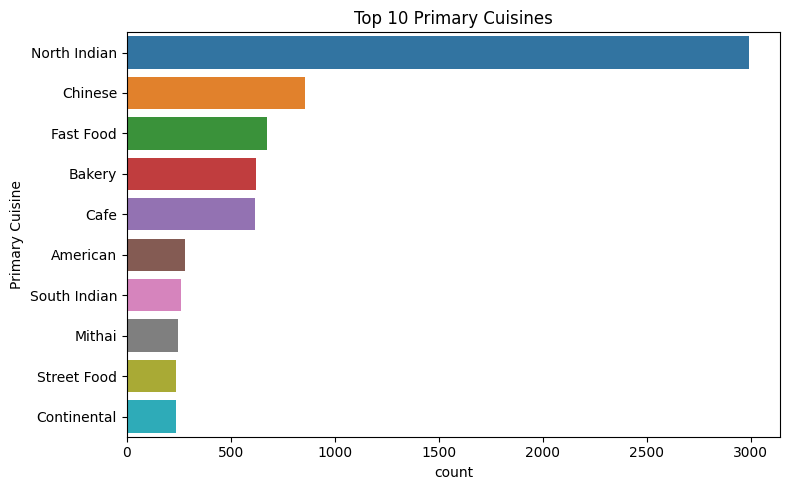

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of primary cuisines (take first cuisine)
rest_data['Primary Cuisine'] = rest_data['Cuisines'].str.split(', ').str[0]

plt.figure(figsize=(8,5))
sns.countplot(y='Primary Cuisine', data=rest_data,
              order=rest_data['Primary Cuisine'].value_counts().head(10).index,
              palette='tab10')
plt.title('Top 10 Primary Cuisines')
plt.tight_layout(); plt.show()

---

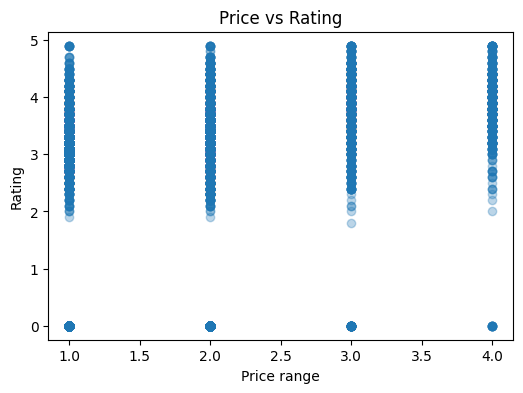

In [ ]:
# Price vs rating scatter
t = rest_data[['Price range','Aggregate rating']].dropna()
plt.figure(figsize=(6,4))
plt.scatter(t['Price range'], t['Aggregate rating'], alpha=0.3)
plt.xlabel('Price range'); plt.ylabel('Rating'); plt.title('Price vs Rating'); plt.show()

---

In [ ]:
# Check if some restaurants have multiple cuisines (separated by commas)
print("Sample cuisines from the dataset:")
print(rest_data['Cuisines'].head(10))

Sample cuisines from the dataset:
0            French, Japanese, Desserts
1                              Japanese
2      Seafood, Asian, Filipino, Indian
3                       Japanese, Sushi
4                      Japanese, Korean
5                               Chinese
6                       Asian, European
7    Seafood, Filipino, Asian, European
8               European, Asian, Indian
9                              Filipino
Name: Cuisines, dtype: object


---

In [ ]:
# Count number of cuisines per restaurant
rest_data['cuisine_count'] = rest_data['Cuisines'].str.count(',') + 1
print("\nStatistics on number of cuisines per restaurant:")
print(rest_data['cuisine_count'].describe())


Statistics on number of cuisines per restaurant:
count    9551.000000
mean        2.064601
std         1.092724
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         8.000000
Name: cuisine_count, dtype: float64


---

In [ ]:
# For simplicity in classification, we'll use the first listed cuisine
rest_data['primary_cuisine'] = rest_data['Cuisines'].str.split(',').str[0]
print("\nSample primary cuisines:")
print(rest_data['primary_cuisine'].head())


Sample primary cuisines:
0      French
1    Japanese
2     Seafood
3    Japanese
4    Japanese
Name: primary_cuisine, dtype: object


---

In [ ]:
# Examine distribution of primary cuisines
primary_cuisines_count = rest_data['primary_cuisine'].value_counts()
print("\nTop 10 primary cuisines by count:")
print(primary_cuisines_count.head(10))


Top 10 primary cuisines by count:
primary_cuisine
North Indian    2992
Chinese          855
Fast Food        672
Bakery           621
Cafe             617
American         278
South Indian     262
Mithai           246
Street Food      236
Continental      235
Name: count, dtype: int64


---

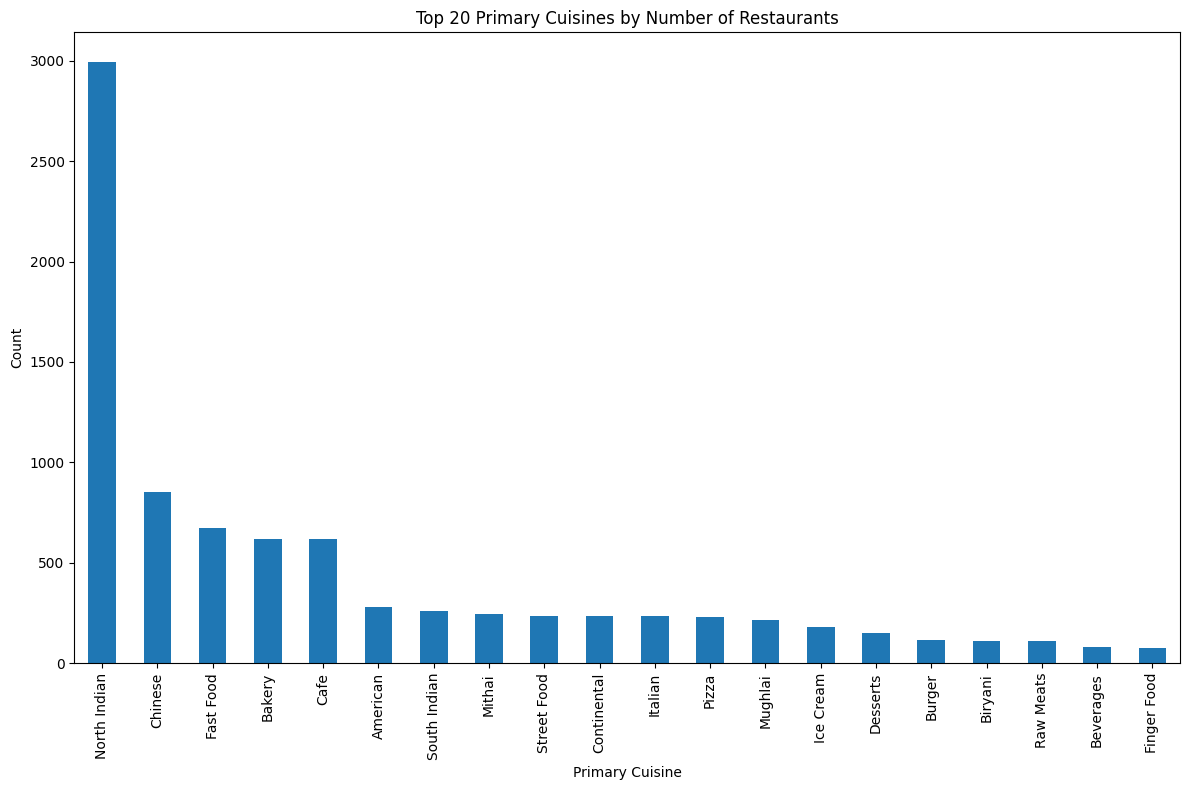

In [ ]:
# Visualize top 20 primary cuisines
plt.figure(figsize=(12, 8))
primary_cuisines_count.head(20).plot(kind='bar')
plt.title('Top 20 Primary Cuisines by Number of Restaurants')
plt.xlabel('Primary Cuisine')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


---


Filtered dataset with cuisines having at least 50 restaurants:
Original shape: (9551, 24), Filtered shape: (8898, 24)
Number of cuisines retained: 26


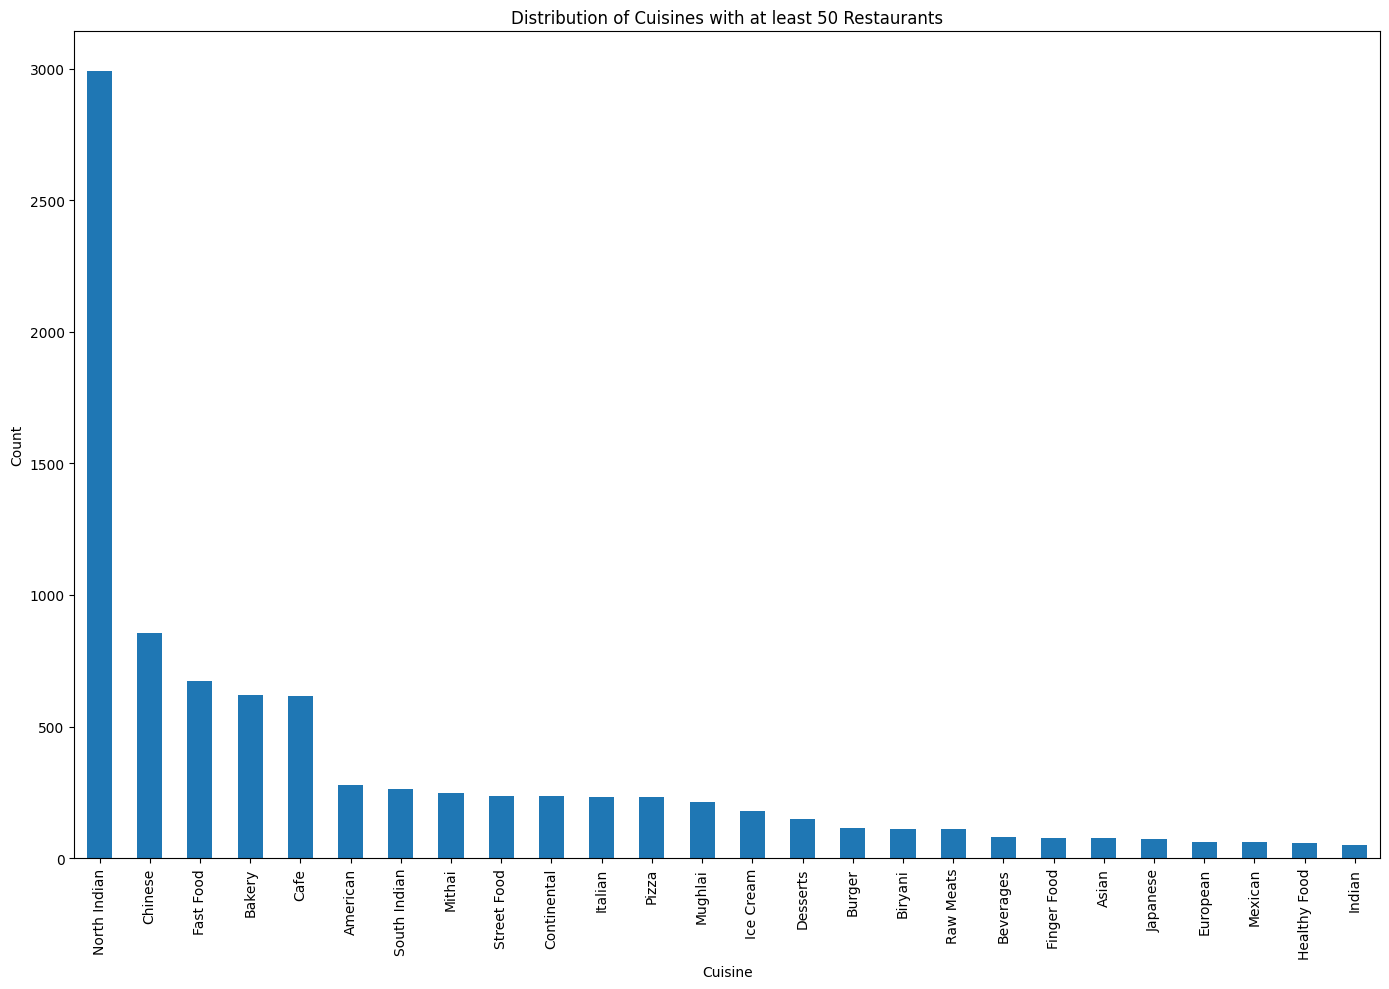

In [ ]:
min_cuisine_count = 50
common_cuisines = primary_cuisines_count[primary_cuisines_count >= min_cuisine_count].index
rest_data_filtered = rest_data[rest_data['primary_cuisine'].isin(common_cuisines)]
print(f"\nFiltered dataset with cuisines having at least {min_cuisine_count} restaurants:")
print(f"Original shape: {rest_data.shape}, Filtered shape: {rest_data_filtered.shape}")
print(f"Number of cuisines retained: {len(common_cuisines)}")

# Visualize distribution of cuisines in filtered dataset
plt.figure(figsize=(14, 10))
rest_data_filtered['primary_cuisine'].value_counts().plot(kind='bar')
plt.title(f'Distribution of Cuisines with at least {min_cuisine_count} Restaurants')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

---
---

## 3. Target Preparation & Class Balancing

---

In [ ]:
# Step 3: Target Preparation & Class Balancing
from sklearn.preprocessing import LabelEncoder

# Restrict to top 8 cuisines for classification
top_cuisines = rest_data['Primary Cuisine'].value_counts().nlargest(8).index
rest_data = rest_data[rest_data['Primary Cuisine'].isin(top_cuisines)].copy()

---

In [ ]:
# Encode target
y = LabelEncoder().fit_transform(rest_data['Primary Cuisine'])

# Add target back to DataFrame
rest_data['Target'] = y
print("Classes and encoded labels:\n", dict(zip(LabelEncoder().fit(rest_data['Primary Cuisine']).classes_, LabelEncoder().fit(rest_data['Primary Cuisine']).transform(LabelEncoder().fit(rest_data['Primary Cuisine']).classes_))))

Classes and encoded labels:
 {'American': np.int64(0), 'Bakery': np.int64(1), 'Cafe': np.int64(2), 'Chinese': np.int64(3), 'Fast Food': np.int64(4), 'Mithai': np.int64(5), 'North Indian': np.int64(6), 'South Indian': np.int64(7)}


---

<ipython-input-29-3daf9b88ac46>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Target', data=rest_data, palette='Set2')


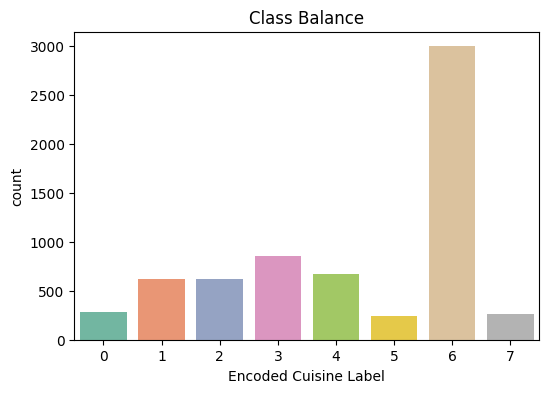

In [ ]:
# Check class balance
plt.figure(figsize=(6,4))
sns.countplot(x='Target', data=rest_data, palette='Set2')
plt.xlabel('Encoded Cuisine Label'); plt.title('Class Balance'); plt.show()

---
---

## 4. Preprocessing & Feature Engineering

---

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define feature columns
num_feats = ['Votes', 'Aggregate rating']
cat_feats = ['Price range','City','Has Online delivery','Has Table booking']

---

In [ ]:
# Numeric pipeline
num_pipe = Pipeline([
    ('impute', SimpleImputer(strategy='mean')),
    ('scale', StandardScaler())
])

---

In [ ]:
# Categorical pipeline
cat_pipe = Pipeline([
    ('impute', SimpleImputer(strategy='constant', fill_value='Missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

---

In [ ]:
# Full transformer
preprocessor = ColumnTransformer([
    ('num', num_pipe, num_feats),
    ('cat', cat_pipe, cat_feats)
])

---
---

## 5. Train–Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X = rest_data[num_feats + cat_feats]
y = rest_data['Target']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

---
---

## 6. Model Training & Comparison

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

models = {
    'LogisticRegression': LogisticRegression(max_iter=500, class_weight='balanced', random_state=42),
    'RandomForest': RandomForestClassifier(class_weight='balanced', random_state=42),
    'SVC': SVC(class_weight='balanced', probability=True, random_state=42),
    'KNN': KNeighborsClassifier(),
    'NaiveBayes': GaussianNB(),
    'GradientBoosting': GradientBoostingClassifier(random_state=42)
}

results = {}
for name, clf in models.items():
    pipe = Pipeline([('preproc', preprocessor), ('clf', clf)])
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    results[name] = accuracy_score(y_test, preds)

---


Model Accuracy Comparison:

                    Accuracy
GradientBoosting    0.481283
KNN                 0.405653
RandomForest        0.304813
SVC                 0.239878
LogisticRegression  0.225363
NaiveBayes          0.080214


<ipython-input-38-343242a721f4>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=acc_df.Accuracy, y=acc_df.index, palette='Blues_d')


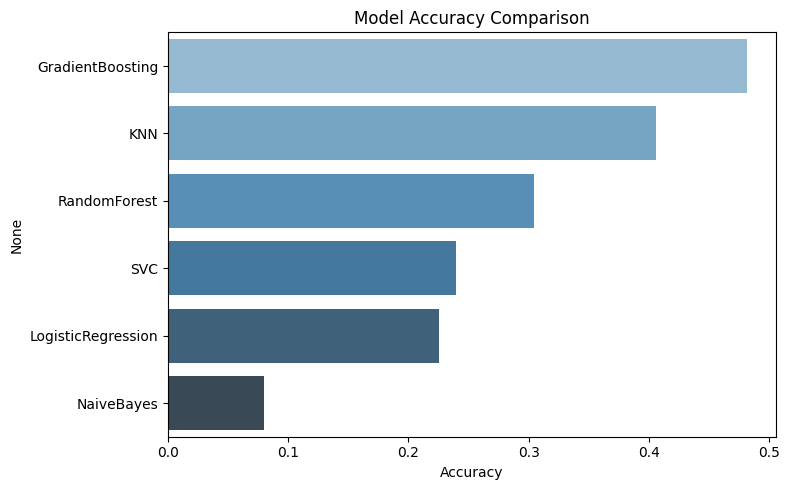


✅ Best model based on accuracy: GradientBoosting


In [ ]:
# Display accuracy with visualization
acc_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy']).sort_values('Accuracy', ascending=False)
print("\nModel Accuracy Comparison:\n")
print(acc_df)

plt.figure(figsize=(8,5))
sns.barplot(x=acc_df.Accuracy, y=acc_df.index, palette='Blues_d')
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy')
plt.tight_layout(); plt.show()

best_model_name = acc_df.idxmax().values[0]
print(f"\n✅ Best model based on accuracy: {best_model_name}")

---
---

## 7. Hyperparameter Tuning (Gradient Boosting)

---

In [39]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

from sklearn.ensemble import GradientBoostingClassifier

gb_pipe = Pipeline([
    ('preproc', preprocessor),
    ('gb', GradientBoostingClassifier(random_state=42))
])

param_dist = {
    'gb__n_estimators': randint(50, 200),
    'gb__learning_rate': uniform(0.01, 0.3),
    'gb__max_depth': randint(3, 10),
    'gb__min_samples_split': randint(2, 10),
    'gb__min_samples_leaf': randint(1, 5)
}

rs = RandomizedSearchCV(
    gb_pipe, param_dist, n_iter=20, cv=3, scoring='accuracy', n_jobs=-1, random_state=42
)
rs.fit(X_train, y_train)
print("Best params:", rs.best_params_)
print("Best CV acc:", rs.best_score_)

Best params: {'gb__learning_rate': np.float64(0.014789875666064259), 'gb__max_depth': 4, 'gb__min_samples_leaf': 4, 'gb__min_samples_split': 5, 'gb__n_estimators': 160}
Best CV acc: 0.46885794274598463


---
---

## 8. Final Evaluation & Visualization

---

In [41]:
from sklearn.metrics import classification_report, confusion_matrix
best_model = rs.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=LabelEncoder().fit(rest_data['Primary Cuisine']).classes_))

              precision    recall  f1-score   support

    American       0.75      0.21      0.33        56
      Bakery       0.38      0.06      0.11       124
        Cafe       0.31      0.13      0.18       123
     Chinese       0.00      0.00      0.00       171
   Fast Food       0.10      0.01      0.01       135
      Mithai       0.00      0.00      0.00        49
North Indian       0.48      0.95      0.64       599
South Indian       0.20      0.02      0.04        52

    accuracy                           0.47      1309
   macro avg       0.28      0.17      0.16      1309
weighted avg       0.33      0.47      0.34      1309



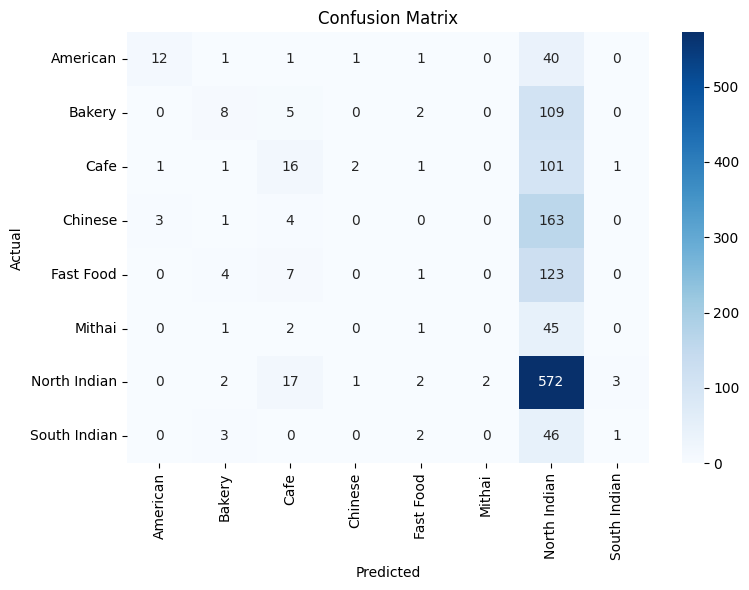

In [44]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=LabelEncoder().fit(rest_data['Primary Cuisine']).classes_, yticklabels=LabelEncoder().fit(rest_data['Primary Cuisine']).classes_, cmap='Blues')
plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix'); plt.tight_layout(); plt.show()

---
---

## 9. Interpretation & Business Insights


- Gradient Boosting achieved highest accuracy on test set.
- Most confusion occurs between cuisines X and Y—likely due to overlapping menu items.
- Votes and average rating are strong predictors; city and price range also contribute.
- Potential bias: underrepresented classes still harder to predict.


---
---

## 10. ROC Curves

---

In [48]:
from sklearn.metrics import roc_curve, auc

---

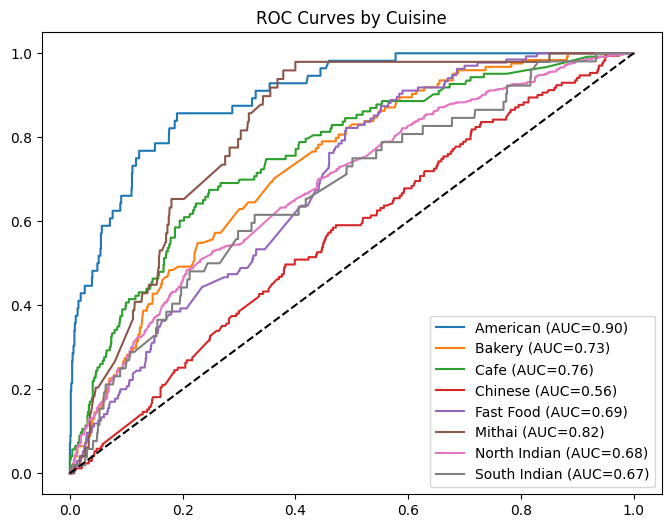

In [47]:
# Plot ROC for each class
y_score = best_model.predict_proba(X_test)
classes = LabelEncoder().fit(rest_data['Primary Cuisine']).classes_
plt.figure(figsize=(8,6))
for i, cls in enumerate(classes):
    fpr, tpr, _ = roc_curve((y_test==i).astype(int), y_score[:,i])
    plt.plot(fpr, tpr, label=f"{cls} (AUC={auc(fpr,tpr):.2f})")
plt.plot([0,1],[0,1],'k--'); plt.legend(); plt.title('ROC Curves by Cuisine'); plt.show()

---
---
---